In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "simple_nn_test"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'), ('optimal_v2', 'close')],
                            param_spec={},
                            optimal_threshold={'buy':0.9},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,60]}
                                    ],

                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi
dataset

Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from LTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from XRPUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...


,time,high,low,close,open,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15089,1505644499999,3600.00000,3580.01000,3580.562345,3600.00000,0.335707,0.614314,0.0,0.437803,0.506742,...,0.424417,0.330691,0.353429,0.290815,0.354388,0.354004,0.524912,0.607026,0.612426,0.688214
15090,1505644559999,3580.01000,3580.01000,3580.286173,3580.01000,0.062379,0.614314,0.0,0.437792,0.506690,...,0.412029,0.359110,0.353429,0.311145,0.344979,0.291951,0.487445,0.590795,0.606950,0.686857
15091,1505644619999,3580.01000,3580.01000,3580.148086,3580.01000,0.061036,0.614314,0.0,0.437787,0.506665,...,0.412029,0.359110,0.329749,0.311145,0.344979,0.248409,0.462677,0.581084,0.603949,0.686169
15092,1505644679999,3580.01000,3580.01000,3580.079043,3580.01000,0.000000,0.614314,0.0,0.438562,0.506653,...,0.412029,0.359110,0.358208,0.311145,0.344979,0.216168,0.445691,0.575175,0.602295,0.685819
15093,1505644739999,3580.03000,3580.01000,3580.044522,3580.03000,0.414935,0.614314,0.0,0.439128,0.506647,...,0.331146,0.359110,0.358208,0.293070,0.289171,0.191336,0.433749,0.571543,0.601380,0.685642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036313,1606715999999,0.62579,0.62486,0.625592,0.62551,206129.500000,0.410072,0.0,0.759314,0.623047,...,0.413172,0.457119,0.487085,0.422341,0.256255,0.603299,0.432656,0.316834,0.283810,0.409828
4036314,1606719659999,0.62705,0.62533,0.626066,0.62588,454736.500000,0.430119,0.0,0.575587,0.614797,...,0.434774,0.505076,0.492244,0.445154,0.273651,0.898996,0.740156,0.530441,0.382673,0.424990
4036315,1606719719999,0.62717,0.62588,0.626273,0.62648,269492.000000,0.428667,0.0,0.641524,0.672428,...,0.467246,0.484906,0.521878,0.466473,0.298213,0.938824,0.808274,0.599140,0.421739,0.431545
4036316,1606719779999,0.62640,0.62554,0.626027,0.62585,66760.800000,0.411734,0.0,0.389431,0.498283,...,0.449521,0.440469,0.504150,0.466660,0.283509,0.484091,0.550547,0.491830,0.387510,0.424521


In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15089,3580.562345,0.614314,0.0,0.437803,0.506742,0.643094,0.618870,0.954938,0.702998,0.658574,...,0.424417,0.330691,0.353429,0.290815,0.354388,0.354004,0.524912,0.607026,0.612426,0.688214
15090,3580.286173,0.614314,0.0,0.437792,0.506690,0.641844,0.613454,0.234349,0.240597,0.504596,...,0.412029,0.359110,0.353429,0.311145,0.344979,0.291951,0.487445,0.590795,0.606950,0.686857
15091,3580.148086,0.614314,0.0,0.437787,0.506665,0.641218,0.610747,0.247454,0.323662,0.475886,...,0.412029,0.359110,0.329749,0.311145,0.344979,0.248409,0.462677,0.581084,0.603949,0.686169
15092,3580.079043,0.614314,0.0,0.438562,0.506653,0.595814,0.609393,0.100000,0.364825,0.433800,...,0.412029,0.359110,0.358208,0.311145,0.344979,0.216168,0.445691,0.575175,0.602295,0.685819
15093,3580.044522,0.614314,0.0,0.439128,0.506647,0.595579,0.608716,0.178633,0.372552,0.425352,...,0.331146,0.359110,0.358208,0.293070,0.289171,0.191336,0.433749,0.571543,0.601380,0.685642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036313,0.625592,0.410072,0.0,0.759314,0.623047,0.401112,0.139733,0.591913,0.351423,0.385132,...,0.413172,0.457119,0.487085,0.422341,0.256255,0.603299,0.432656,0.316834,0.283810,0.409828
4036314,0.626066,0.430119,0.0,0.575587,0.614797,0.615009,0.210805,1.000000,0.926362,0.670744,...,0.434774,0.505076,0.492244,0.445154,0.273651,0.898996,0.740156,0.530441,0.382673,0.424990
4036315,0.626273,0.428667,0.0,0.641524,0.672428,0.667195,0.241843,0.874455,0.817930,0.738574,...,0.467246,0.484906,0.521878,0.466473,0.298213,0.938824,0.808274,0.599140,0.421739,0.431545
4036316,0.626027,0.411734,0.0,0.389431,0.498283,0.569628,0.204873,0.088966,0.553596,0.564097,...,0.449521,0.440469,0.504150,0.466660,0.283509,0.484091,0.550547,0.491830,0.387510,0.424521


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,CCI_close_period_30,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
0,57.263650,0.477939,0.722290,0.599597,0.423138,0.315791,4.852873e-01,0.329653,0.344641,0.412949,...,0.533352,0.336835,0.368910,0.371973,0.321923,0.017433,0.075596,0.163439,0.253210,0.437830
1,7477.420247,0.425810,0.749774,0.850302,0.929310,0.957988,1.000000e+00,0.772110,0.693959,0.491257,...,0.461304,0.345138,0.317539,0.390512,0.430922,0.978201,0.913561,0.807707,0.709353,0.492528
2,10427.432586,0.480288,0.469408,0.531094,0.314301,0.259537,8.870131e-12,0.253098,0.366213,0.376008,...,0.503986,0.569391,0.453525,0.415926,0.334223,0.256071,0.219385,0.207947,0.254604,0.433531
3,10485.944747,0.387197,0.632085,0.634198,0.428634,0.338894,6.978638e-01,0.723444,0.437006,0.390408,...,0.507192,0.420739,0.413951,0.510648,0.384044,0.518312,0.466224,0.405057,0.385782,0.385973
4,152.145799,0.566301,0.485928,0.487824,0.267214,0.431892,2.958416e-12,0.053801,0.326229,0.409151,...,0.493744,0.339806,0.322968,0.387183,0.442376,0.004646,0.045609,0.176273,0.352481,0.548800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269570,0.477707,0.457617,0.339624,0.637308,0.218966,0.217828,2.220297e-11,0.086195,0.332114,0.380231,...,0.477892,0.451375,0.397027,0.422213,0.447773,0.351996,0.318367,0.322749,0.365004,0.442302
269571,8934.388258,0.410849,0.163013,0.490762,0.666067,0.901635,1.227553e-01,0.541399,0.628414,0.621637,...,0.562985,0.432172,0.494030,0.562154,0.435474,0.541814,0.717258,0.772029,0.687032,0.458043
269572,41.866890,0.583921,0.339528,0.181582,0.109397,0.550916,2.853255e-12,0.203565,0.278032,0.458067,...,0.666276,0.337525,0.320738,0.319488,0.391189,0.000868,0.016740,0.112304,0.351391,0.563746
269573,9636.616959,0.646640,0.468026,0.398798,0.638597,0.392427,1.000000e+00,0.909883,0.671847,0.566158,...,0.373279,0.539630,0.421802,0.340473,0.257573,0.959153,0.839849,0.645766,0.514671,0.651250


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [29]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
callbacks = []

#stop model from training when it starts to get bad
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0, 
                                patience=5, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks.append(early_stop)


# # getting the model_version name for the model checkpoint callback
# # keep is_nn to false here so it doesn't save the model just yet
# version_number = nu.exportModel(model, model_name, False, indicators, features, proba_threshold=0.0, is_nn=False, save_model=False)

# #saving model when validation accuracy gets better
# checkpoint_call = tf.keras.callbacks.ModelCheckpoint(f'./v2/strategy/saved_models/{model_name}/{version_number}', 
#                                      monitor='val_accuracy', 
#                                      verbose=0, 
#                                      save_best_only=True,
#                                      save_weights_only=False, 
#                                      mode='auto', 
#                                      save_freq='epoch')
# callbacks.append(checkpoint_call)

# if not os.path.isdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs'):
#     os.mkdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs')
# tensorb = tf.keras.callbacks.TensorBoard(log_dir=f'./v2/strategy/saved_models/{model_name}/{version_number}/logs',
#                                  histogram_freq=0, 
#                                  write_graph=True, 
#                                  write_images=False,    
#                                  update_freq='epoch', 
#                                  profile_batch=2, 
#                                  embeddings_freq=0,    
#                                  embeddings_metadata=None)
# callbacks.append(tensorb)

In [31]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, callbacks=callbacks, epochs=30, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/30
8425/8425 [==============================] - 27s 3ms/step - loss: 0.5035 - accuracy: 0.7005 - val_loss: 342205856.0000 - val_accuracy: 0.6923
Epoch 2/30
8425/8425 [==============================] - 27s 3ms/step - loss: 0.4791 - accuracy: 0.7129 - val_loss: 0.4559 - val_accuracy: 0.6530
Epoch 3/30
8425/8425 [==============================] - 27s 3ms/step - loss: 0.4763 - accuracy: 0.7137 - val_loss: 965.7681 - val_accuracy: 0.5159
Epoch 4/30
8425/8425 [==============================] - 27s 3ms/step - loss: 0.4721 - accuracy: 0.7146 - val_loss: 0.4856 - val_accuracy: 0.5676
Epoch 5/30
8425/8425 [==============================] - 29s 3ms/step - loss: 0.4689 - accuracy: 0.7135 - val_loss: 0.4698 - val_accuracy: 0.6842
Epoch 6/30
8425/8425 [==============================] - 32s 4ms/step - loss: 0.4679 - accuracy: 0.7170 - val_loss: 0.5072 - val_accuracy: 0.6099
Epoch 7/30
8425/8425 [==============================] - 31s 4ms/step - loss: 0.4654 - accuracy: 0.7187 - val_loss: 0.579

In [38]:
reduced_classified_data = nu.classifyPoints(model, testX, predict_proba=True, proba_thresh=0.7, plot_optimal=True, optimal=testy, is_nn=True)

In [39]:
smaller_view_data = reduced_classified_data[1000:2000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

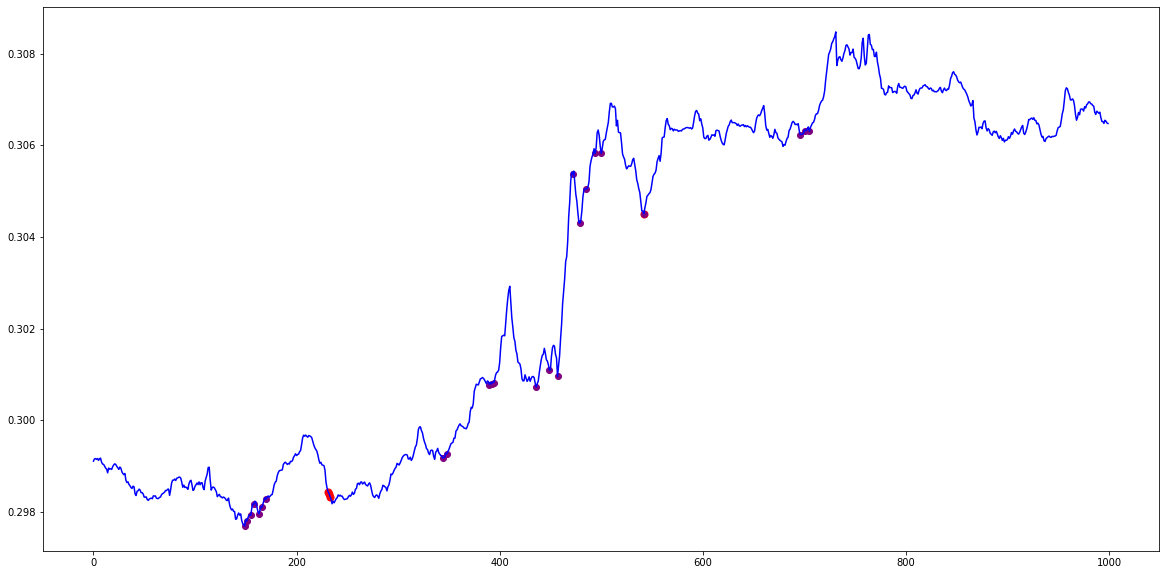

In [40]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [25]:
# model_version = nu.exportModel(model, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.75, is_nn=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/simple_nn_test/1_0/assets


In [26]:
# score, trades = nu.testModel(model_name, num_processes=4)

Importing Strategies...
Generating Model Data...
Preprocessing Model Predictions...
0it [00:00, ?it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 142366.77it/s]
Generating Report...


TypeError: cannot unpack non-iterable NoneType object